In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import tensorflow as tf

In [2]:
Nx = 3
Nt = 101
u = 0.1
x = np.linspace(start=0, stop=1, num=Nx)
dx = 1 / (Nx-1)
T = 10
dt = T/(Nt-1)
alpha = np.zeros((Nt, Nx))
alpha[0,:] = 1
alpha[:, 0] = 0.5

for n in range(Nt-1):
    for j in range(1, Nx):
        alpha[n+1, j] = alpha[n, j] - (dt/dx)*u*(alpha[n, j] - alpha[n, j-1])

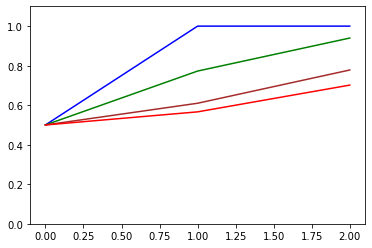

In [3]:
plt.plot(alpha[0, :], color='blue')
plt.plot(alpha[30,:], color='green')
plt.plot(alpha[75, :], color='brown')
plt.plot(alpha[-1, :], color='red')
plt.ylim([0, 1.1])
plt.show()

In [12]:
model = tf.keras.models.load_model('modeltheotp4')

In [17]:
mod = tf.keras.models.load_model('EDP/model_tp4_sigmoid_v3')


OSError: Cannot parse file b'EDP/model_tp4_sigmoid_v3/saved_model.pb': Error parsing message with type 'tensorflow.SavedModel'.

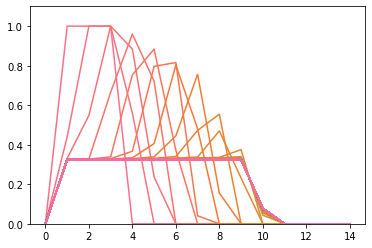

In [7]:
Nx = 15
Nt = 101
u = 0.4
x = np.linspace(start=0, stop=1, num=Nx)
dx = 1 / (Nx-1)
T = 10
dt = T/(Nt-1)
alpha = np.zeros((Nt, Nx))
alpha[0, :4] = 1
alpha[:, 0] = alpha[:, -1] = 0

for n in range(Nt-1):
    X_prec = np.array([alpha[n, 0], u*dt/dx]).reshape(1, -1)
    pred_prec = model.predict(X_prec)
    for j in range(1, Nx-1):
        X_curr = np.array([alpha[n, j], u*dt/dx]).reshape(1, -1)
        pred_curr = model.predict(X_curr)
        alpha[n+1, j] = alpha[n, j] - pred_curr + pred_prec
        pred_prec = pred_curr
        
N = Nt
colors = sns.color_palette('husl', N)
for i in range(N):
    plt.plot(alpha[i, :], color=colors[i])
plt.ylim([0, 1.1])
plt.show()

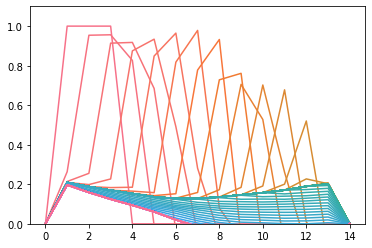

In [8]:
def u_var(t, x):
    return 0.5*np.abs(np.cos(t) + np.sin(x))



Nx = 15
Nt = 101
x = np.linspace(start=0, stop=1, num=Nx)
dx = 1 / (Nx-1)
Tmax = 10
times = np.linspace(start=0, stop=Tmax, num=Nt)
dt = T/(Nt-1)
alpha = np.zeros((Nt, Nx))
alpha[0, :4] = 1
alpha[:, 0] = alpha[:, -1] = 0


for n in range(Nt-1):
    X_prec = np.array([alpha[n, 0], u_var(times[n], x[0])*dt/dx]).reshape(1, -1)
    pred_prec = model.predict(X_prec)
    for j in range(1, Nx-1):
        X_curr = np.array([alpha[n, j], u_var(times[n], x[j])*dt/dx]).reshape(1, -1)
        pred_curr = model.predict(X_curr)
        alpha[n+1, j] = alpha[n, j] - pred_curr + pred_prec
        pred_prec = pred_curr
        
N = Nt
colors = sns.color_palette('husl', N)
for i in range(N):
    plt.plot(alpha[i, :], color=colors[i])
plt.ylim([0, 1.1])
plt.show()

## QUESTION 4 ##

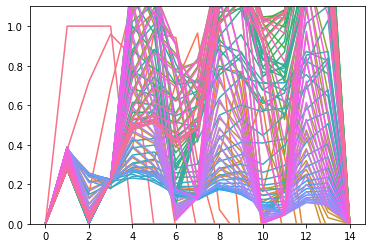

In [11]:
def u_var2(t, x):
    return 0.5*(np.cos(2*np.pi*t) + np.sin(3/2 * np.pi *x))

Nx = 15
Nt = 101
x = np.linspace(start=0, stop=1, num=Nx)
dx = 1 / (Nx-1)
Tmax = 10
times = np.linspace(start=0, stop=Tmax, num=Nt)
dt = T/(Nt-1)
alpha = np.zeros((Nt, Nx))
alpha[0, :4] = 1
alpha[:, 0] = alpha[:, -1] = 0

for n in range(Nt-1):
    X_prec = np.array([alpha[n, 0], u_var(times[n], x[-1] -1/2*dx)*dt/dx]).reshape(1, -1)
    pred_prec = model.predict(X_prec)
    for j in range(1, Nx-1):
        X_curr = np.array([alpha[n, j], u_var(times[n], x[j] +1/2*dx)*dt/dx]).reshape(1, -1)
        pred_curr = model.predict(X_curr)
        alpha[n+1, j] = alpha[n, j] * (1 + dt/dx * (u_var2(n,j+1/2*dx) - u_var2(n,j-1/2*dx) ))\
                        - pred_curr + pred_prec
        pred_prec = pred_curr

N = Nt
colors = sns.color_palette('husl', N)
for i in range(N):
    plt.plot(alpha[i, :], color=colors[i])
plt.ylim([0, 1.1])
plt.show()

In [10]:
plt.plot(u_var2(times,x))

ValueError: operands could not be broadcast together with shapes (101,) (15,) 